In [8]:
%matplotlib inline

In [9]:
pwd

'/home/morrill/mae6286'

ls = list

.. takes us up one folder in the current directory, to "morrill/"

we then put the path into the lesson 01 folder for the numerical mooc repository (/numerical-mooc/lessons/01_phugoid/) to find the file name of the .py file that defines the function for plotting phugoid oscillations. 

In [10]:
ls ../numerical-mooc/lessons/01_phugoid/

01_01_Phugoid_Theory.ipynb        figures/
01_02_Phugoid_Oscillation.ipynb   phugoid.py*
01_03_PhugoidFullModel.ipynb      README.md
01_04_Second_Order_Methods.ipynb  Rocket_Assignment.ipynb
burn.rate.png


Now we can call the cell magic "run" to run that .py file so that the funciton is defined.

In [11]:
%run ../numerical-mooc/lessons/01_phugoid/phugoid.py

Now we'll play with the plotting function to reproduce the cases shown in the lesson.

First lets solve equation 15 for $C$ so that we can more easily select values for $z$, $z_t$, and $\theta$. Then lets define a funtion to solve it for us.

Equation (15) solved for C:


$$\begin{equation}
C = \frac{\cos \theta - \frac{z}{3z_t}}{\sqrt{\frac{z_t}{zt}}}
\end{equation}$$

In [892]:
def solveC(z,zt,theta):
    C = (numpy.cos(theta) - z/(3*zt))/numpy.sqrt(zt/z)
    return C

In [894]:
solveC(1,1,numpy.pi)
print("C = %.3f" % C)

C = 0.440


# Idea for picking values to plot:
This is a new idea I had. Write a function that randomly tries inputs for equation 15 until it gets a specified/desirerd C value. Then output them.

And so here is it below.

In [895]:
import random
def give_input():
    count = 0
    i = 0
    while i < 1:
        z = random.uniform(1e-3,1000)
        zt = random.uniform(1e-3,1000)
        theta = random.uniform(0,numpy.pi)
        C = solveC(z,zt,theta)
        count+=1
        if C > 0 and C < 2/3:
            i+=1
    return (z,zt,theta,C,count)

The function, give_input() randomly tries inputs of z, and zt between 0.001 and 1000 and theta between 0 and pi for equation 15 solved for C until the value of C is between 0 and 2/3. It then outputs those parameters to be used in the plottin function plot_flight_path.

See the below example for calling the function, printing the result, and plotting the returned parameters.

z = 167.07
zt = 810.07
theta = 1.24
C = 0.116
times through loop = 5


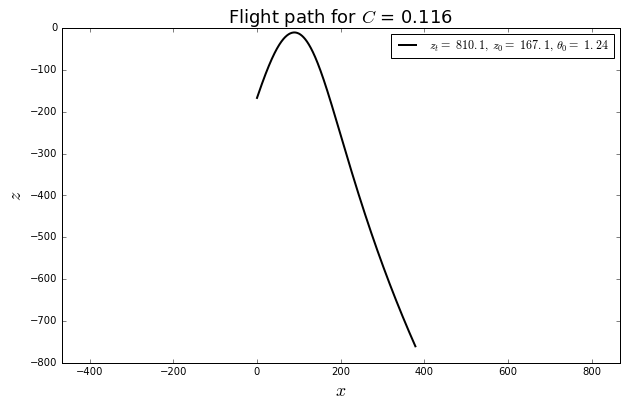

In [913]:
[z,zt,theta,C,count] = give_input()
a = ''
print("z = %0.2f\nzt = %0.2f\ntheta = %0.2f\nC = %0.3f\ntimes through loop = %.f" % (z,zt,theta,C,count))
plot_flight_path(zt,z,theta)